# Visualizing journal subscription costs in the U.K.

By [Daniel Himmelstein](//dhimmel.com)

In [1]:
import os

import pandas
import numpy
import seaborn
import matplotlib.ticker
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
seaborn.set(style='ticks')

In [4]:
# save tidy dataframe as a tsv
path = os.path.join('data', 'subscriptions.tsv')
cost_df = pandas.read_table(path)

# convert to thousands of pounds
for column in ['total', 'cost']:
    cost_df[column] = cost_df[column] / 1000

In [5]:
years = list(set(cost_df.year))

## It's obvious that *Elsevier* will be Cash Money till the death of it

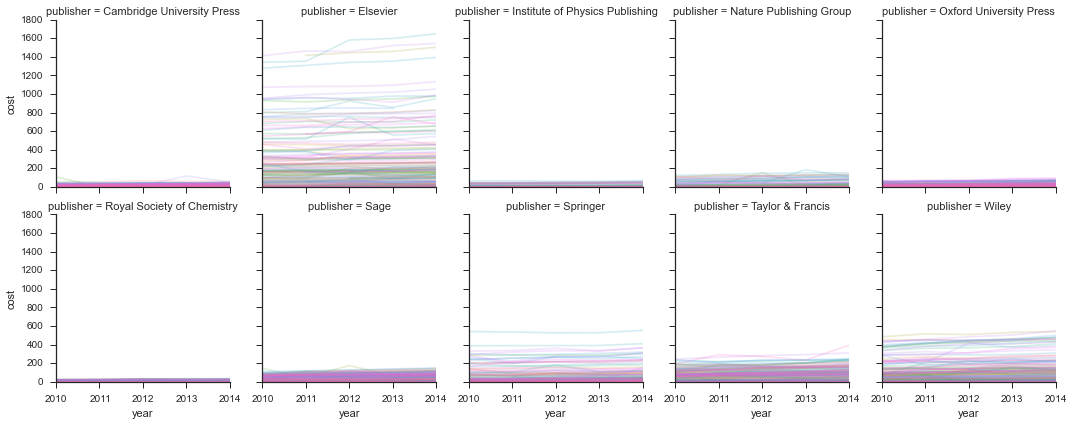

In [6]:
# Subscription costs over time for each publisher and institution
grid = seaborn.FacetGrid(cost_df, col='publisher', hue='university', col_wrap=5)
grid.set(xticks=years)
for axis in grid.axes: axis.ticklabel_format(useOffset=False)
grid.map(plt.plot, 'year', 'cost', alpha=0.2);

Elsevier subscriptions are the most costly by far. Springer and Wiley are also costly, but pale in comparison to Elsevier.

## Subscription costs rose but didn't skyrocket over the last 5 years

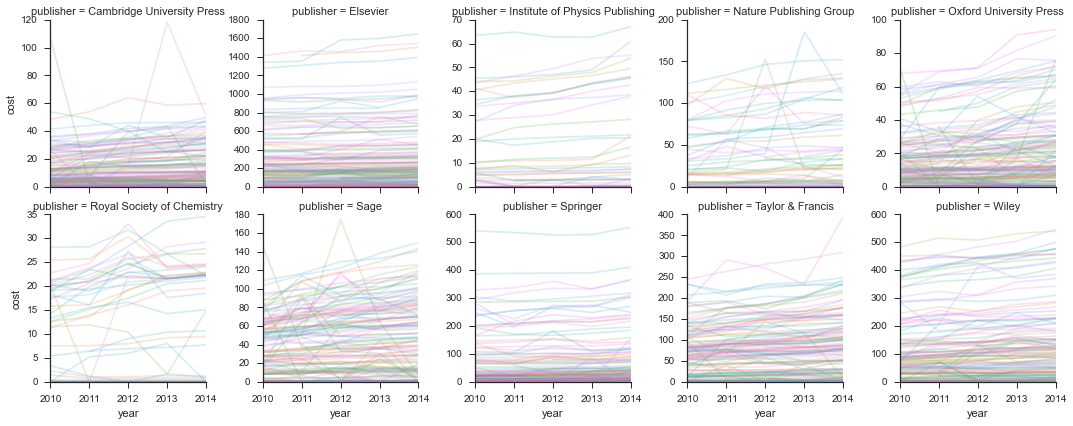

In [7]:
# Subscription costs over time for each publisher and institution
# Independent y-axes
grid = seaborn.FacetGrid(cost_df, col='publisher', hue='university', col_wrap=5, sharey=False)
grid.set(xticks=years)
for axis in grid.axes: axis.ticklabel_format(useOffset=False)
grid.map(plt.plot, 'year', 'cost', alpha=0.2);

## Some subscription costs vary wildly year to year  

In [8]:
# compute relative cost compared to 2014
cost_2014_df = cost_df[cost_df.year == 2014]
cost_2014_df = cost_2014_df.rename(columns={'cost': 'cost_2014'})
cost_2014_df = cost_2014_df.drop(['year', 'total'], axis=1)
relative_df = cost_df.merge(cost_2014_df)
relative_df = relative_df[(relative_df.cost != 0) & (relative_df.cost_2014 != 0)]
relative_df['relative_cost'] = relative_df.cost / relative_df.cost_2014
relative_df['log_relative_cost'] = numpy.log(relative_df.relative_cost)

In [9]:
# subscriptions costs that have drastically increased 
relative_df.sort('relative_cost').head(n=10)

,publisher,year,university,total,cost,cost_2014,relative_cost,log_relative_cost
4407,Cambridge University Press,2010,University of Kent,2126.62412,0.15600,51.14600,0.003050,-5.792584
535,Elsevier,2010,Sheffield Hallam University,195.22379,0.16920,55.35482,0.003057,-5.790438
2856,Sage,2013,University of Bradford,239.77429,0.07200,19.29000,0.003733,-5.590676
4162,Cambridge University Press,2010,Aston University,1313.20414,0.07150,12.12743,0.005896,-5.133528
2801,Sage,2013,Aston University,1313.20414,0.01519,2.40000,0.006329,-5.062587
4553,Cambridge University Press,2011,University of Portsmouth,2873.57337,0.12925,16.01000,0.008073,-4.819220
3810,Oxford University Press,2011,Middlesex University,895.04203,0.24100,15.66400,0.015386,-4.174323
2853,Sage,2010,University of Bradford,239.77429,0.37531,19.29000,0.019456,-3.939590
4113,Oxford University Press,2012,London South Bank University,741.23508,1.57800,75.61102,0.020870,-3.869444
3667,Oxford University Press,2013,University of Greenwich,1039.89057,0.29600,12.67453,0.023354,-3.756990


The above table shows journals that rose drastically in price in 2014 compared to a previous year. These could indicate:

+ incorrect reported costs
+ institutions getting ripped off in 2014
+ institutions that got a slick deal in previous years

In [ ]:
# subscriptions costs that have drastically decreased
relative_df.sort('relative_cost', ascending=False).head(n=10)

,publisher,year,university,total,cost,cost_2014,relative_cost,log_relative_cost
3178,Sage,2010,University of Portsmouth,2873.57337,16.75975,0.05400,310.365741,5.737751
3180,Sage,2012,University of Portsmouth,2873.57337,10.38158,0.05400,192.251481,5.258804
3804,Oxford University Press,2010,Manchester Metropolitan University,2025.00180,21.34161,0.17856,119.520665,4.783489
3438,Sage,2011,University of the Arts London,60.72716,10.03000,0.10397,96.470136,4.569233
3439,Sage,2012,University of the Arts London,60.72716,8.02400,0.10397,77.176108,4.346090
3179,Sage,2011,University of Portsmouth,2873.57337,3.39130,0.05400,62.801852,4.139985
3128,Sage,2010,Middlesex University,895.04203,86.66400,3.02893,28.612084,3.353829
2496,Taylor & Francis,2011,Open University,3657.35200,77.60600,2.91100,26.659567,3.283148
3065,Sage,2012,Leeds Beckett University (formerly Leeds Metro...,1918.74901,174.66916,7.00520,24.934215,3.216241
3041,Sage,2013,University of Kent,2126.62412,6.98600,0.32300,21.628483,3.074011


The above table shows journals that rose drastically in price in 2014 compared to a previous year. These could indicate:

+ incorrect reported costs
+ institutions got ripped off but negotiated more favorable rates for 2014
+ institutions getting a slick deal for 2014

In [ ]:
grid = seaborn.FacetGrid(relative_df, col='publisher', hue='university', col_wrap=5)
grid.set(xticks=years)
for axis in grid.axes: axis.ticklabel_format(useOffset=False)
grid.map(plt.plot, 'year', 'log_relative_cost', alpha=0.2);

The above plot shows that there were a large number of pricing anomalies, where subscription costs varied wildly year to year for the same publisher and same institution.

## The general trend across all publishers is increasing subsription costs

In [ ]:
grid = seaborn.FacetGrid(relative_df, col='publisher', hue='university', col_wrap=5)
grid.set(ylim=(-0.5, 0.5), xticks=years)
for axis in grid.axes: axis.ticklabel_format(useOffset=False)
grid.map(plt.plot, 'year', 'log_relative_cost', alpha=0.2);

Elsevier subscrition costs have increased less so than other publishers. This is probably because even a small increase for the most expensive publisher would break the library's bank. Sage, Taylor & Francis, Cambridge University Press, and Nature Publishing Group all appear to be chasing cash money to the death of them.